# Feature Engineering

**Creating New Features** <br>
**Examples** 
- Length of text field
- Percent of characters that are punctuation 
- Percentage of characters that are capitalized 

In [1]:
import pandas as pd
import nltk 
import re 
import string 
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline

In [2]:
%matplotlib inline

 ## Feature Creation

In [3]:
data = pd.read_csv('SMSSpamCollection.tsv', sep='\t')
data.columns = ['label', 'body_text']
data.head()

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


In [4]:
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data.head()

,label,body_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
1,ham,"Nah I don't think he goes to usf, he lives aro...",49
2,ham,Even my brother is not like to speak with me. ...,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135


In [5]:
punct = string.punctuation

In [6]:
# Can take the logic and put it directly in the lambda function

def punct_count(text): # Count the percent of text that are punctuation
    return round((sum([1 for char in text if char in punct])/(len(text) - text.count(" ")))*100,3)

In [7]:
data['puct_percent'] = data['body_text'].apply(lambda x: punct_count(x))
data.head()

,label,body_text,body_len,puct_percent
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.688
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.082
2,ham,Even my brother is not like to speak with me. ...,62,3.226
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.143
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.444


## Evaluate Created Features

In [8]:
bins = np.linspace(0,200,40) # Return evenly spaced numbers over a specified interval.
bins_punct = np.linspace(0, 50, 40)

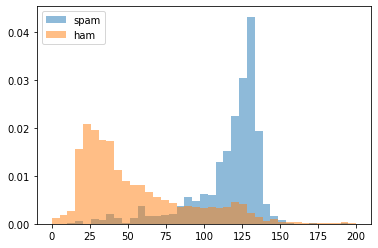

In [9]:
plt.hist(data[data['label']=='spam']['body_len'], bins, alpha=0.5,density=True,label='spam')
plt.hist(data[data['label']=='ham']['body_len'],bins, alpha=0.5,density=True,label='ham')
plt.legend(loc='upper left')
plt.show()

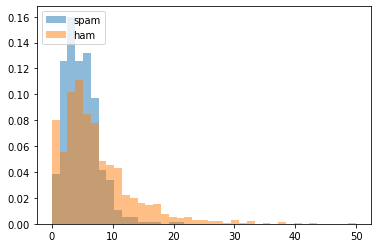

In [10]:
plt.hist(data[data['label']=='spam']['puct_percent'], bins_punct, alpha=0.5,density=True,label='spam')
plt.hist(data[data['label']=='ham']['puct_percent'],bins_punct, alpha=0.5,density=True,label='ham')
plt.legend(loc='upper left')
plt.show()

- It can be noted that the Spam messages seem to be longer than non-spam (ham) messages. This is a good feature that can help the model better distinguish between the two 
- In comparison, the feature for percent punction does not seem to very distinguishable between the two classes and would probably be best to drop 
 - However, we can keep it in to test how the model performs w/ & w/out the additional feature 

## Transformations

In [11]:
data.head()

,label,body_text,body_len,puct_percent
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.688
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.082
2,ham,Even my brother is not like to speak with me. ...,62,3.226
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.143
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.444


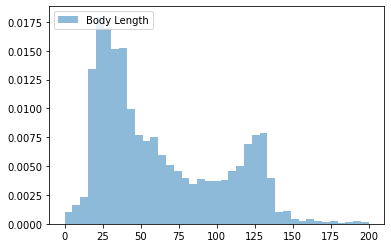

In [12]:
# Check for the distrbution of the actual feature 
plt.hist(data['body_len'], bins, alpha=0.5,density=True,label='Body Length')
plt.legend(loc='upper left')
plt.show()

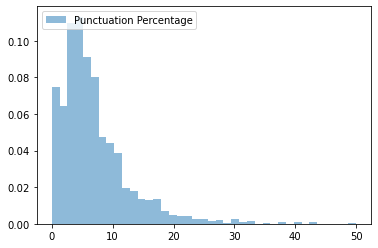

In [13]:
# Check for the distrbution of the actual feature 
plt.hist(data['puct_percent'], bins_punct, alpha=0.5,density=True,label='Punctuation Percentage')
plt.legend(loc='upper left')
plt.show()

- This one is pretty skewed, so we can apply a transformation to normalize this. If not, the model may unnecessarily focus more on the skewed data

## Process 
1. Determine what range of exponents to test 
2. Apply each transformation to each value of your hcosen feature
3. Use some criteria to determine which of the transformations yield the best distribution 

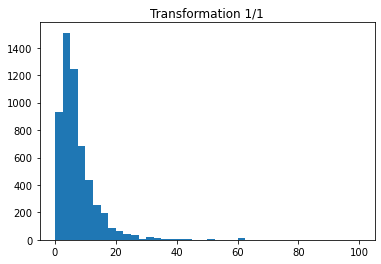

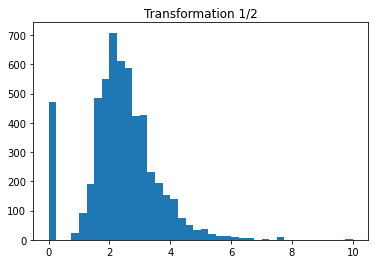

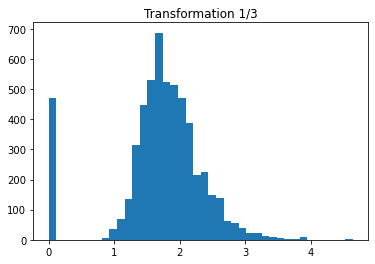

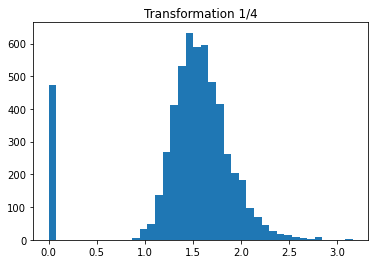

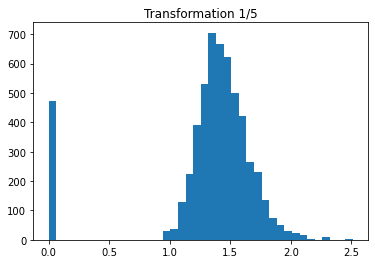

In [14]:
for i in [1,2,3,4,5]:
    plt.hist((data['puct_percent'])**(1/i), bins=40)
    plt.title(f'Transformation 1/{str(i)}')
    plt.show()

- Based on the above graphs, the transformations for 1/4 & 1/5 seem to work really well. **Power transformations** such as this can help work with skewed data